# Importation des packages

In [8]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import pandas as pd

# Chargement des Données

In [ ]:
data_path = os.path.join(os.path.dirname(__file__), '../Data') 

X_train = pd.read_csv(data_path + "X_train_update.csv")
X_test = pd.read_csv(data_path + "X_test_update.csv")
y_train = pd.read_csv(data_path + "Y_train_CVw08PX.csv")

In [5]:
# Afficher les premières lignes de chaque fichier
X_train=X_train.drop(columns=["Unnamed: 0"])
X_test=X_test.drop(columns=["Unnamed: 0"])
y_train=y_train.drop(columns=["Unnamed: 0"])

print(X_train.head())
print(X_test.head())
print(y_train.head())

                                         designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  
0                                                NaN  3804725264  1263597046  
1                                                NaN   436067568  1008141237  
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978  
3                                                NaN    50418756   457047496  
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786  
                                         designation  \
0  Folkmanis Puppets - 2732 - Marionnette Et Théâ...   
1  Porte Flamme Gaxix - Flamebringer Gaxix - 136/...   
2                  Po

In [6]:
# Taille des datasets
print("Taille X_train:", X_train.shape)
print("Taille X_test:", X_test.shape)
print("Taille y_train:", y_train.shape)

Taille X_train: (84916, 4)
Taille X_test: (13812, 4)
Taille y_train: (84916, 1)


In [7]:
# Vérifier les types de données et les valeurs manquantes
print(X_train.info())
print(X_test.info())
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13812 entries, 0 to 13811
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  13812 non-null  object
 1   description  8926 non-null   object
 2   productid    13812 non-null  int64 
 3   imageid      13812 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 431.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84916 entries, 0 to 84915
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------

# EDA

In [8]:
# Vérifier les valeurs manquantes
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(y_train.isnull().sum())

designation        0
description    29800
productid          0
imageid            0
dtype: int64
designation       0
description    4886
productid         0
imageid           0
dtype: int64
prdtypecode    0
dtype: int64


In [9]:
# Description manquante
X_train.loc[:, "description"] = X_train["description"].fillna("")
X_test.loc[:, "description"] = X_test["description"].fillna("")

In [10]:
# Vérification
print(X_train.isnull().sum())
print(X_test.isnull().sum())

designation    0
description    0
productid      0
imageid        0
dtype: int64
designation    0
description    0
productid      0
imageid        0
dtype: int64


In [11]:
# Statistiques générales
print(X_train.describe())
print(y_train["prdtypecode"].value_counts())  # Distribution des classes

          productid       imageid
count  8.491600e+04  8.491600e+04
mean   2.555468e+09  1.152691e+09
std    1.588656e+09  1.751427e+08
min    1.839120e+05  6.728400e+04
25%    6.760519e+08  1.056269e+09
50%    3.190506e+09  1.213354e+09
75%    3.995599e+09  1.275646e+09
max    4.252012e+09  1.328824e+09
prdtypecode
2583    10209
1560     5073
1300     5045
2060     4993
2522     4989
1280     4870
2403     4774
2280     4760
1920     4303
1160     3953
1320     3241
10       3116
2705     2761
1140     2671
2582     2589
40       2508
2585     2496
1302     2491
1281     2070
50       1681
2462     1421
2905      872
60        832
2220      824
1301      807
1940      803
1180      764
Name: count, dtype: int64


## Visualisation de la Distribution des Catégories

In [12]:
y_train['prdtypecode'].nunique()

27

In [13]:
# Comptage des occurrences de chaque catégorie
category_counts = y_train['prdtypecode'].value_counts()

# Affichage avec formatage
for category, count in category_counts.items():
    print(f"Code Produit {category}: {count} occurrences")

Code Produit 2583: 10209 occurrences
Code Produit 1560: 5073 occurrences
Code Produit 1300: 5045 occurrences
Code Produit 2060: 4993 occurrences
Code Produit 2522: 4989 occurrences
Code Produit 1280: 4870 occurrences
Code Produit 2403: 4774 occurrences
Code Produit 2280: 4760 occurrences
Code Produit 1920: 4303 occurrences
Code Produit 1160: 3953 occurrences
Code Produit 1320: 3241 occurrences
Code Produit 10: 3116 occurrences
Code Produit 2705: 2761 occurrences
Code Produit 1140: 2671 occurrences
Code Produit 2582: 2589 occurrences
Code Produit 40: 2508 occurrences
Code Produit 2585: 2496 occurrences
Code Produit 1302: 2491 occurrences
Code Produit 1281: 2070 occurrences
Code Produit 50: 1681 occurrences
Code Produit 2462: 1421 occurrences
Code Produit 2905: 872 occurrences
Code Produit 60: 832 occurrences
Code Produit 2220: 824 occurrences
Code Produit 1301: 807 occurrences
Code Produit 1940: 803 occurrences
Code Produit 1180: 764 occurrences


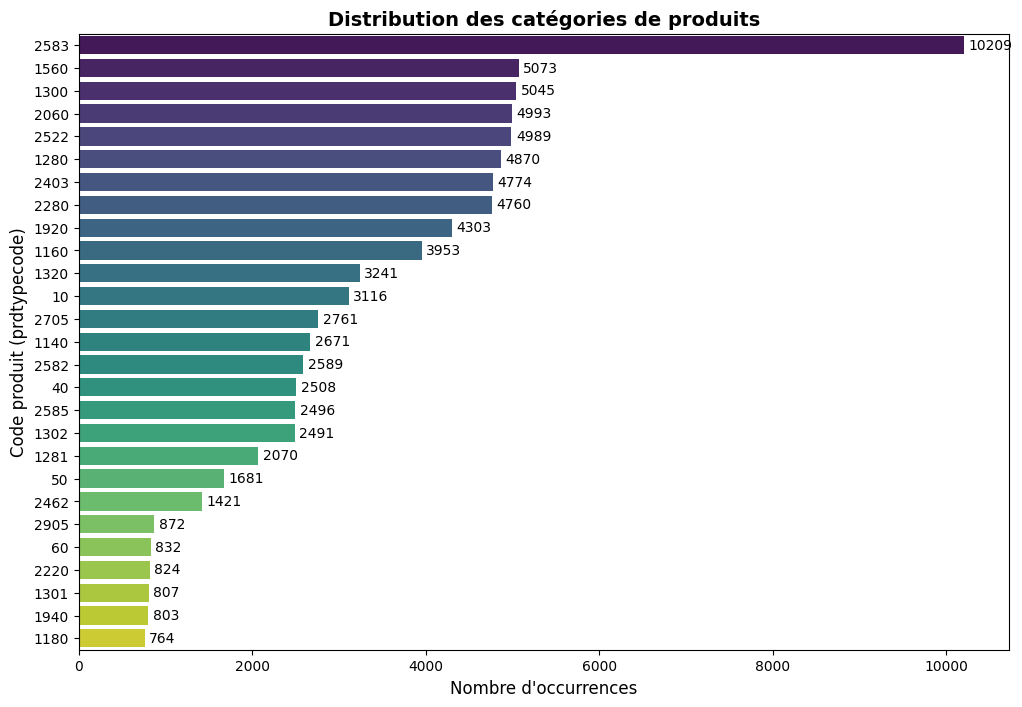

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comptage des occurrences par catégorie
category_counts = y_train['prdtypecode'].value_counts()

# Création du graphique
plt.figure(figsize=(12, 8))
sns.barplot(
    y=category_counts.index.astype(str),  # Conversion en string pour éviter les problèmes d'affichage
    x=category_counts.values,
    palette="viridis"
)

# Ajout des annotations (nombre d'occurrences)
for index, value in enumerate(category_counts.values):
    plt.text(value + 50, index, str(value), va='center', fontsize=10, color='black')

# Ajout des titres et labels
plt.xlabel("Nombre d'occurrences", fontsize=12)
plt.ylabel("Code produit (prdtypecode)", fontsize=12)
plt.title("Distribution des catégories de produits", fontsize=14, fontweight='bold')

# Affichage du graphique
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


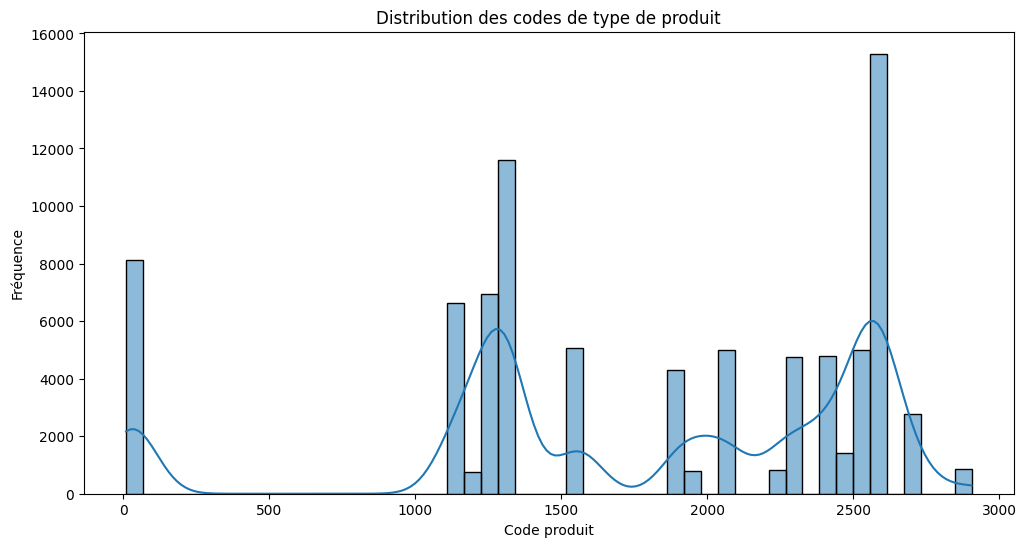

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des catégories de produits
plt.figure(figsize=(12, 6))
sns.histplot(y_train['prdtypecode'], bins=50, kde=True)
plt.title("Distribution des codes de type de produit")
plt.xlabel("Code produit")
plt.ylabel("Fréquence")
plt.show()

La distribution des codes produits (prdtypecode) est déséquilibrée.\
En effet, il y a un écart important entre la catégorie majoritaire (2583 avec 10 209 occurrences) et les catégories minoritaires (1180 avec 764 occurrences).\
Il faudra réequilibrer les classes pour éviter que nos modèles apprennent trop des classes majoritaires et pas assez des classes minoritaires. 

## Top 10 Catégories de Produits

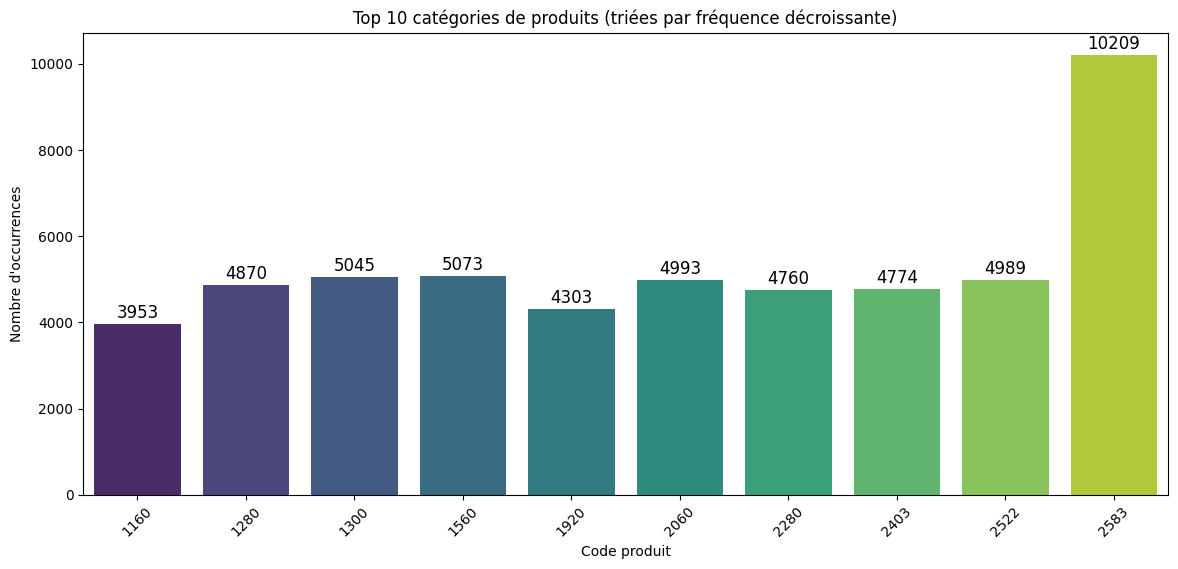

In [16]:
# Distribution des catégories (Top 10 classes)
plt.figure(figsize=(14, 6))

top_classes = y_train["prdtypecode"].value_counts().nlargest(10)  

ax = sns.barplot(x=top_classes.index, y=top_classes.values, palette="viridis")

# Ajouter des annotations sur les barres
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 8), textcoords='offset points')

plt.title("Top 10 catégories de produits (triées par fréquence décroissante)")
plt.xlabel("Code produit")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.show()


## Longueur des Titres et Descriptions

### X_train

In [17]:
# Calcul des longueurs des textes
X_train["designation_length"] = X_train["designation"].apply(lambda x: len(str(x)))
X_train["description_length"] = X_train["description"].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Affichage des valeurs minimales et maximales
min_designation = X_train["designation_length"].min()
max_designation = X_train["designation_length"].max()
min_description = X_train["description_length"].min()
max_description = X_train["description_length"].max()

print(f"Longueur minimale de 'designation' : {min_designation} caractères")
print(f"Longueur maximale de 'designation' : {max_designation} caractères")
print(f"Longueur minimale de 'description' : {min_description} caractères")
print(f"Longueur maximale de 'description' : {max_description} caractères")

Longueur minimale de 'designation' : 11 caractères
Longueur maximale de 'designation' : 250 caractères
Longueur minimale de 'description' : 0 caractères
Longueur maximale de 'description' : 12451 caractères


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


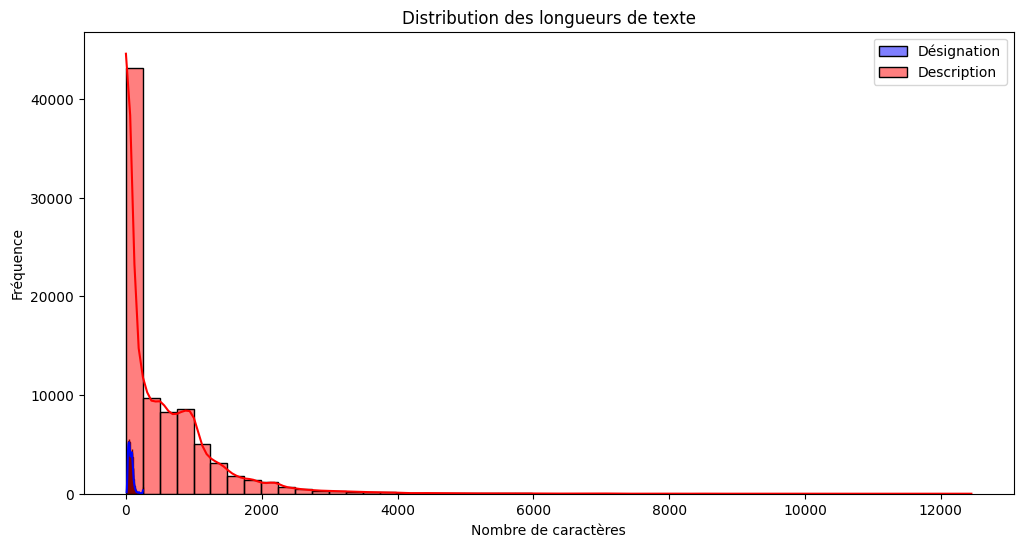

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(X_train["designation_length"], bins=50, kde=True, color="blue", label="Désignation")
sns.histplot(X_train["description_length"], bins=50, kde=True, color="red", label="Description")
plt.title("Distribution des longueurs de texte")
plt.xlabel("Nombre de caractères")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

### X_test 

In [19]:
# Calcul des longueurs des textes pour X_test
X_test["designation_length"] = X_test["designation"].apply(lambda x: len(str(x)))
X_test["description_length"] = X_test["description"].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Affichage des valeurs minimales et maximales pour X_test
min_designation_test = X_test["designation_length"].min()
max_designation_test = X_test["designation_length"].max()
min_description_test = X_test["description_length"].min()
max_description_test = X_test["description_length"].max()

print(f"X_test - Longueur minimale de 'designation' : {min_designation_test} caractères")
print(f"X_test - Longueur maximale de 'designation' : {max_designation_test} caractères")
print(f"X_test - Longueur minimale de 'description' : {min_description_test} caractères")
print(f"X_test - Longueur maximale de 'description' : {max_description_test} caractères")

X_test - Longueur minimale de 'designation' : 11 caractères
X_test - Longueur maximale de 'designation' : 250 caractères
X_test - Longueur minimale de 'description' : 0 caractères
X_test - Longueur maximale de 'description' : 22299 caractères


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


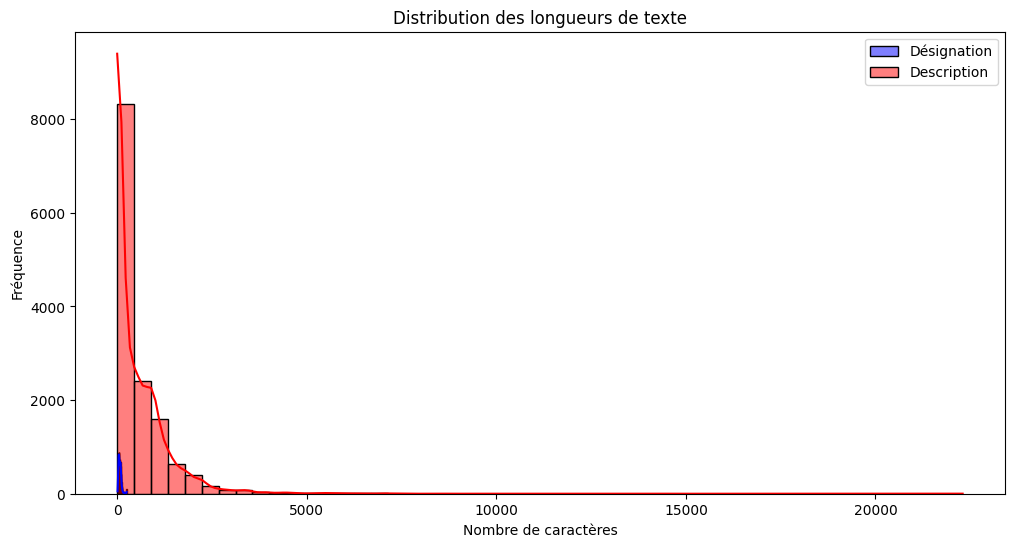

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(X_test["designation_length"], bins=50, kde=True, color="blue", label="Désignation")
sns.histplot(X_test["description_length"], bins=50, kde=True, color="red", label="Description")
plt.title("Distribution des longueurs de texte")
plt.xlabel("Nombre de caractères")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

### Comparaison X_train et X_test

| **Variable**            | **X_train**        | **X_test**         |
|-------------------------|--------------------|--------------------|
| Désignation Min         | 11 caractères      | 11 caractères      |
| Désignation Max         | 250 caractères     | 250 caractères     |
| Description Min         | 0 caractères       | 0 caractères       |
| Description Max         | 12451 caractères   | 22299 caractères   |


## Corrélation entre Longueur des Textes et Catégories

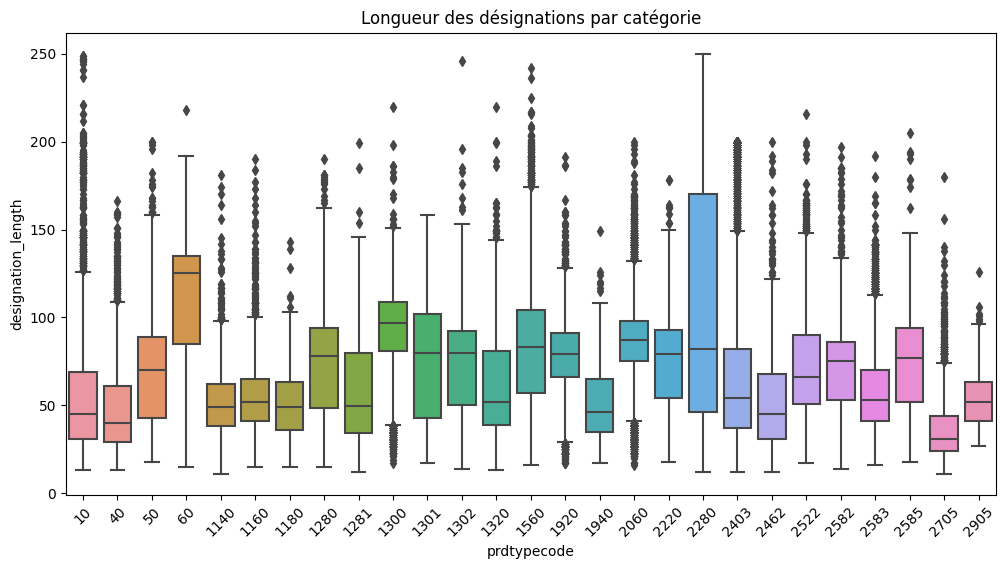

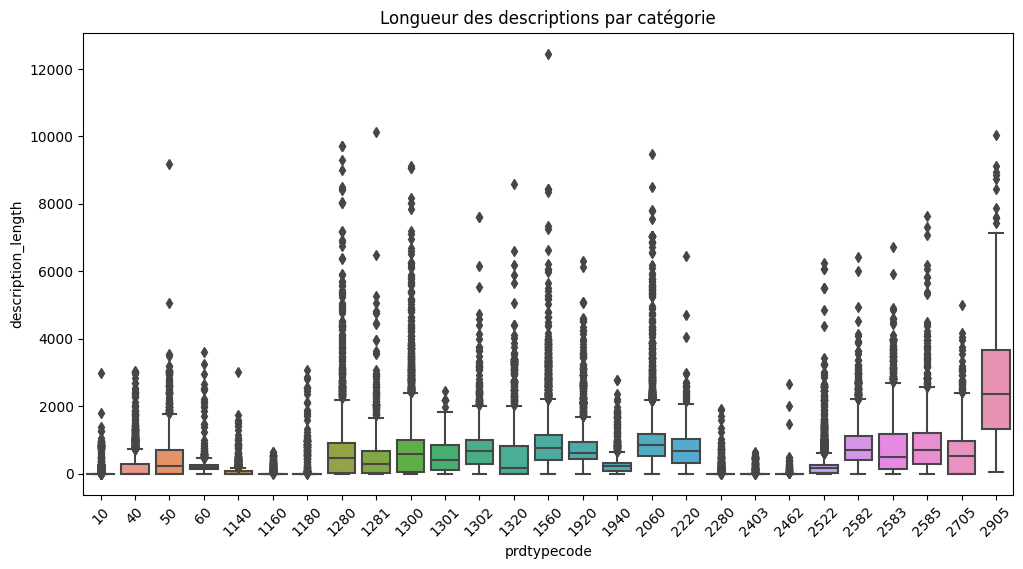

In [21]:
# ✍️ Corrélation entre longueur des textes et catégories

# Ajouter les longueurs de texte à X_train
X_train["designation_length"] = X_train["designation"].apply(lambda x: len(str(x)))
X_train["description_length"] = X_train["description"].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Fusionner avec y_train pour avoir prdtypecode dans X_train
X_train_merged = pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(12, 6))
sns.boxplot(x="prdtypecode", y="designation_length", data=X_train_merged)
plt.xticks(rotation=45)
plt.title("Longueur des désignations par catégorie")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="prdtypecode", y="description_length", data=X_train_merged)
plt.xticks(rotation=45)
plt.title("Longueur des descriptions par catégorie")
plt.show()

## Prétraitement du texte 

In [22]:
pd.set_option('display.max_colwidth', None)
X_train['description'].head(10)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
def preprocess_text(text):
    # 1. Suppression des balises HTML
    text = BeautifulSoup(text, "html.parser").get_text()

    # 2. Conversion des entités HTML (ex: &#39; -> ')
    text = html.unescape(text)

    # 3. Conversion en minuscules
    text = text.lower()

    # 4. Suppression des accents (ex: é -> e)
    text = unidecode(text)

    # 5. Suppression des caractères spéciaux (ponctuation, chiffres, unités)
    text = re.sub(r'[^a-z\s]', '', text)  # Supprimer tout sauf les lettres et espaces

    # 6. Tokenisation : Diviser le texte en mots
    tokens = word_tokenize(text)

    # 7. Suppression des mots vides (stopwords)
    stop_words = set(stopwords.words('french'))  # Liste de mots vides en français
    tokens = [word for word in tokens if word not in stop_words]

    # 8. Application du stemming : réduction des mots à leur racine
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # 9. Suppression des mots trop courts (1-2 lettres) et trop fréquents
    freq_dist = FreqDist(tokens)
    tokens = [word for word in tokens if len(word) > 2 and freq_dist[word] < 50]  # Suppression des mots très courts et très fréquents

    return ' '.join(tokens)

# Exemple de données
sample_text = """Tente pliante V3S5 Pro PVC 500 gr/m² - 3 x 4m50.Que vous soyez un particulier pour votre jardin ou un professionnel pour stand commercial ou pour vos réceptions le barnum V3S5 Pro de 135 m² sera vous combler.Imaginez un <strong>stand</strong> robuste léger adaptable à chacun pliable et peu encombrant... Le déploiement ultra-rapide et le réglage de la hauteur se font maintenant via des poignées d&#39;indexage. Nous avons également entièrement repensé les pièces de jonction et les coulissants : plus rigides et légères elles sont aussi maintenant 30% plus résistantes.  la <strong>tente pliante</strong> V3 Pro de <strong>qualité professionnelle </strong>et de<strong> fabrication française </strong>est complètement adaptable et deviendra l&#39;"""

# Appliquer le prétraitement
preprocessed_text = preprocess_text(sample_text)

# Afficher le texte après prétraitement
print("Texte après prétraitement :")
print(preprocessed_text)


Texte après prétraitement :
tent pliant pro pvc grm mque particuli jardin professionnel stand commerci recept barnum pro comblerimaginez stand robust leger adapt chacun pliabl peu encombr deploiement ultrarapid reglag hauteur font mainten via poigne dindexag egal entier repens piec jonction couliss plu rigid leger ell aussi mainten plu resistant tent pliant pro qualit professionnel fabric francais complet adapt deviendra


In [25]:
X_train['designation'] = X_train['designation'].apply(preprocess_text)
print(X_train['designation'].head(20))

<ipython-input-24-bbaf74ba928c>:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


0                                                                        olivia personalisiert notizbuch seiten punktrast din rosendesign
1              journal art ndeg lart march salon dart asiatiqu pari jacqu barrer francoi perrier reform vent encher publiqu sna fete cent
2                                                                 grand stylet ergonomiqu bleu gamepad nintendo wii speedlink pilot style
3                                                                                         peluch donald europ disneyland marionnett doigt
4                                                                                                                              guerr tuqu
5                                                                                     afriqu contemporain ndeg hiver dossier japon afriqu
6                                                                                                 christof bildungsprozessen auf der spur
7                                 

In [26]:
X_train['description'] = X_train['description'].apply(preprocess_text)
print(X_train['description'].head(20))

<ipython-input-24-bbaf74ba928c>:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-24-bbaf74ba928c>:13: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## Nuage de Mots des Désignations

### X_train

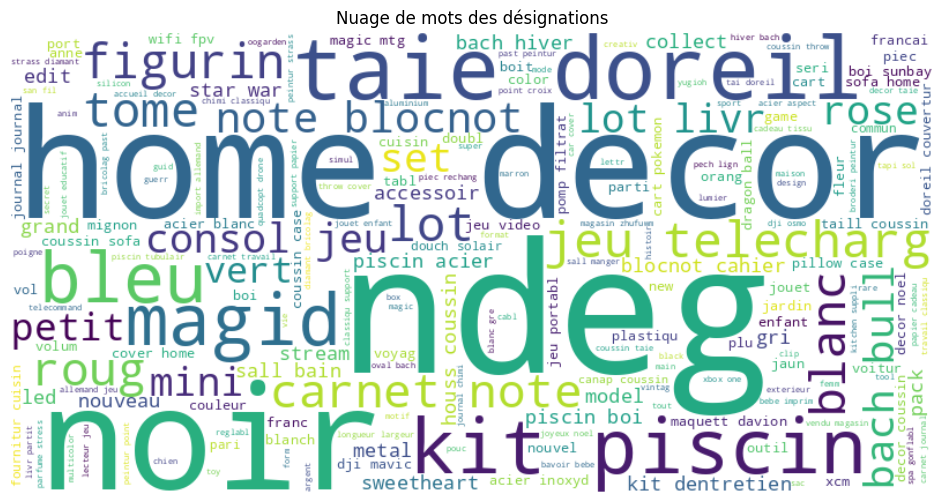

In [27]:
from wordcloud import WordCloud

# ☁️ Nuage de mots pour les désignations
text_data = " ".join(X_train["designation"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=200).generate(text_data)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots des désignations")
plt.show()

## Nuage de mot des description

### X_train

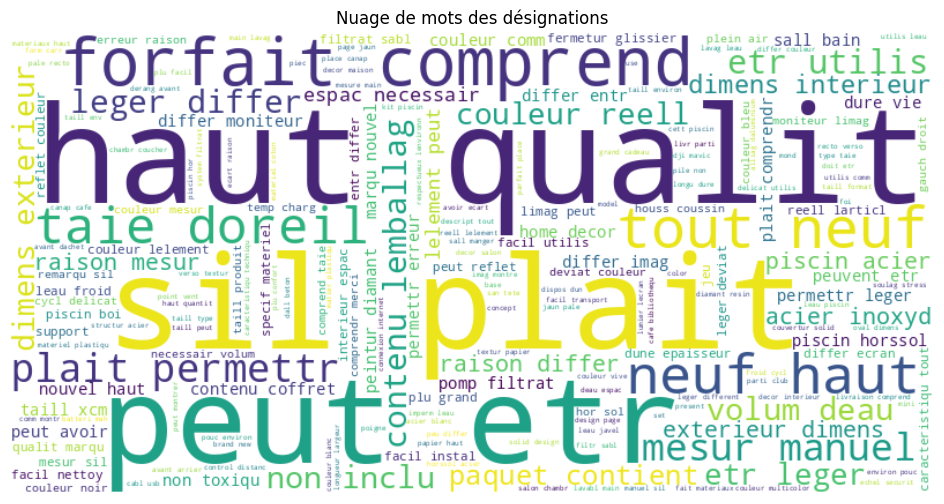

In [29]:
from wordcloud import WordCloud

# ☁️ Nuage de mots pour les désignations
text_data = " ".join(X_train["description"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=200).generate(text_data)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots des désignations")
plt.show()

## Exploration du vocabulaire avec TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Appliquer le TF-IDF sur la colonne 'description' de X_train
vectorizer = TfidfVectorizer(max_features=1000)  # Limite le nombre de features à 1000 mots
X_tfidf = vectorizer.fit_transform(X_train['designation'])

# Convertir la matrice TF-IDF en DataFrame pour une meilleure visualisation
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Afficher les termes les plus fréquents
top_n = 20
terms = vectorizer.get_feature_names_out()

# Trouver les mots avec les plus grandes scores
average_scores = tfidf_df.mean(axis=0)
top_n_terms = average_scores.sort_values(ascending=False).head(top_n)

print("Top 20 mots les plus importants selon le score TF-IDF :")
print(top_n_terms)

Top 20 mots les plus importants selon le score TF-IDF :
ndeg       0.028195
lot        0.019832
piscin     0.019602
jeu        0.016531
decor      0.013432
the        0.011970
coussin    0.011084
cart       0.010340
kit        0.009937
enfant     0.009827
blanc      0.009711
noir       0.009611
boi        0.009245
figurin    0.008465
edit       0.008371
tome       0.008278
jouet      0.008260
bleu       0.007791
bebe       0.007631
taie       0.007531
dtype: float64


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Appliquer le TF-IDF sur la colonne 'description' de X_train
vectorizer = TfidfVectorizer(max_features=1000)  # Limite le nombre de features à 1000 mots
X_tfidf = vectorizer.fit_transform(X_train['description'])

# Convertir la matrice TF-IDF en DataFrame pour une meilleure visualisation
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Afficher les termes les plus fréquents
top_n = 20
terms = vectorizer.get_feature_names_out()

# Trouver les mots avec les plus grandes scores
average_scores = tfidf_df.mean(axis=0)
top_n_terms = average_scores.sort_values(ascending=False).head(top_n)

print("Top 20 mots les plus importants selon le score TF-IDF :")
print(top_n_terms)

Top 20 mots les plus importants selon le score TF-IDF :
piscin      0.021033
couleur     0.019690
taill       0.018081
haut        0.015859
plu         0.015251
tout        0.014702
peut        0.014138
facil       0.013990
qualit      0.013918
produit     0.013109
the         0.012743
dimens      0.012528
and         0.012138
differ      0.011871
enfant      0.011801
utilis      0.011791
decor       0.011721
etr         0.011048
type        0.010891
materiel    0.010183
dtype: float64


## Analyse des Images

In [33]:
import cv2
import os
import numpy as np

# Dossiers des images
train_image_folder = data_path + "images/images/image_train/"
test_image_folder = data_path + "images/images/image_test/"

# Vérifier les images disponibles
train_images = os.listdir(train_image_folder)
test_images = os.listdir(test_image_folder)

print("Nombre d'images d'entraînement :", len(train_images))
print("Nombre d'images de test :", len(test_images))

print("Quelques images d'entraînement :", train_images[:5])
print("Quelques images de test :", test_images[:5])

Nombre d'images d'entraînement : 84916
Nombre d'images de test : 13812
Quelques images d'entraînement : ['image_1133291293_product_2161940337.jpg', 'image_1212733879_product_3432933682.jpg', 'image_1100250821_product_261000874.jpg', 'image_1266775993_product_3939947579.jpg', 'image_1306547801_product_4167077634.jpg']
Quelques images de test : ['image_1191531798_product_3108369194.jpg', 'image_1274393362_product_4389346.jpg', 'image_1321593042_product_4223061003.jpg', 'image_1111721282_product_1914393304.jpg', 'image_1094418380_product_1619138967.jpg']


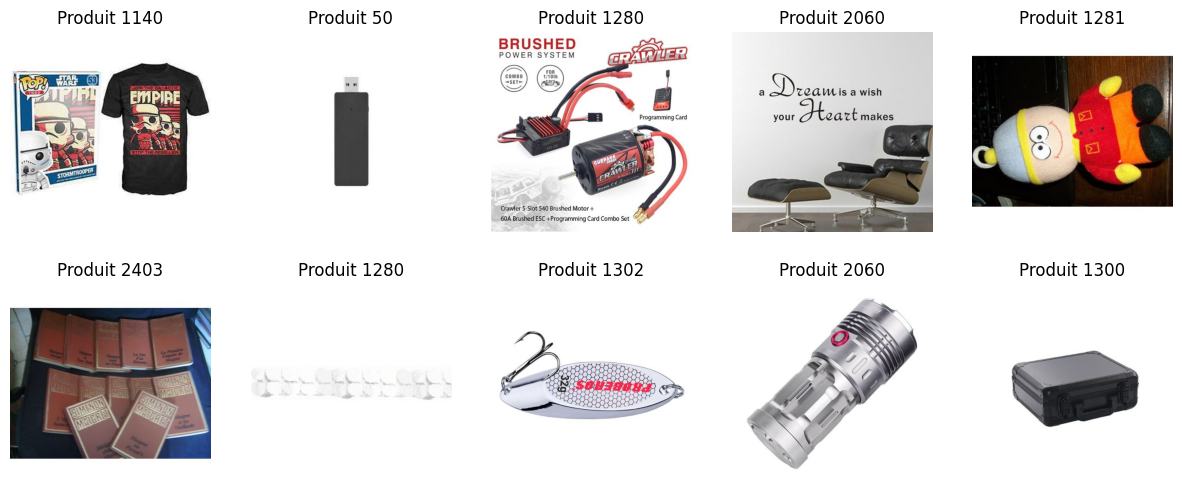

In [34]:
# 📷 Affichage aléatoire d'images avec label
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
sample_images = np.random.choice(train_images, 10, replace=False)

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(train_image_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Trouver le productid correspondant
    product_id = int(img_name.split("_")[3].split(".")[0])
    label = X_train_merged[X_train_merged["productid"] == product_id]["prdtypecode"].values
    label = label[0] if len(label) > 0 else "Inconnu"

    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title(f"Produit {label}")
    ax.axis("off")

plt.show()

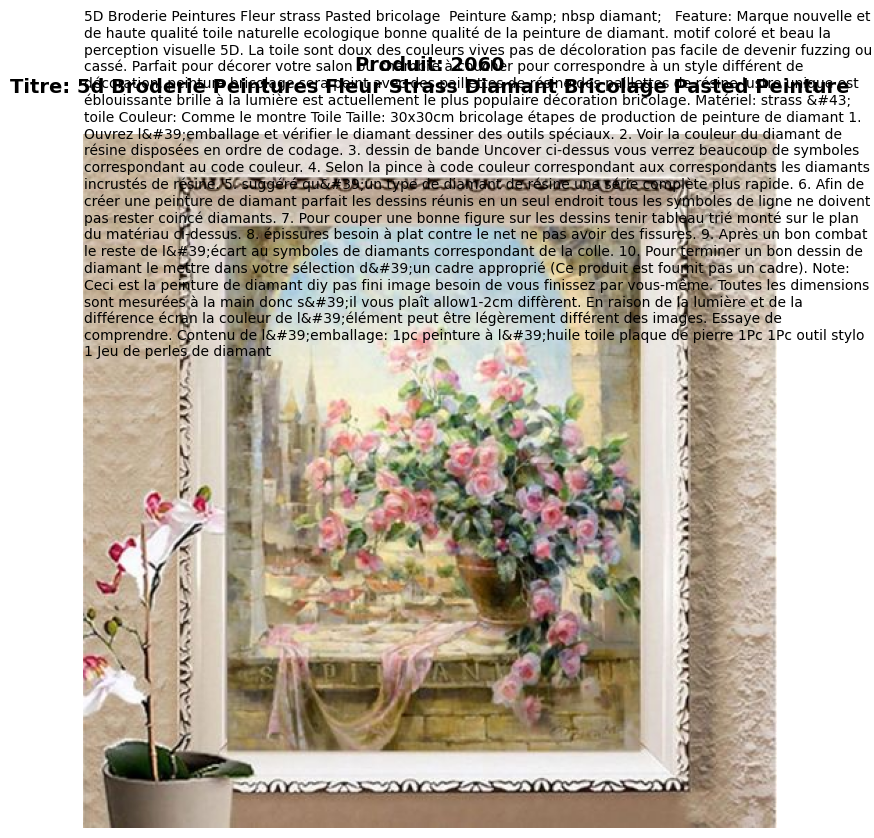

In [35]:
# 📷 Affichage d'une image avec label, titre et description
fig, ax = plt.subplots(figsize=(8, 12))  # Augmenter la taille de l'image et de l'espace pour la description

# Choisir une image au hasard
img_name = np.random.choice(train_images)

img_path = os.path.join(train_image_folder, img_name)
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Trouver le productid correspondant
product_id = int(img_name.split("_")[3].split(".")[0])

# Récupérer le label, le titre et la description du produit
label = X_train_merged[X_train_merged["productid"] == product_id]["prdtypecode"].values
label = label[0] if len(label) > 0 else "Inconnu"

title = X_train_merged[X_train_merged["productid"] == product_id]["designation"].values
title = title[0] if len(title) > 0 else "Titre Inconnu"

description = X_train_merged[X_train_merged["productid"] == product_id]["description"].values
description = description[0] if len(description) > 0 else "Description Inconnue"

# Affichage de l'image avec le titre
ax.imshow(img)
ax.set_title(f"Produit: {label}\nTitre: {title}", fontsize=14, fontweight='bold', pad=30)  # Affichage du titre complet sans '...'
ax.axis("off")

# Ajouter la description en bas de l'image avec un espacement suffisant
ax.text(0, -90, description, color="black", fontsize=10, ha="left", va="top", wrap=True)  # Ajuster y pour plus d'espace

# Ajuster l'affichage pour éviter que le titre et la description se chevauchent
plt.subplots_adjust(bottom=0.3)  # Plus d'espace en bas pour la description
plt.tight_layout()
plt.show()

## Analyse des Tailles des Images

       Hauteur  Largeur
count  84916.0  84916.0
mean     500.0    500.0
std        0.0      0.0
min      500.0    500.0
25%      500.0    500.0
50%      500.0    500.0
75%      500.0    500.0
max      500.0    500.0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


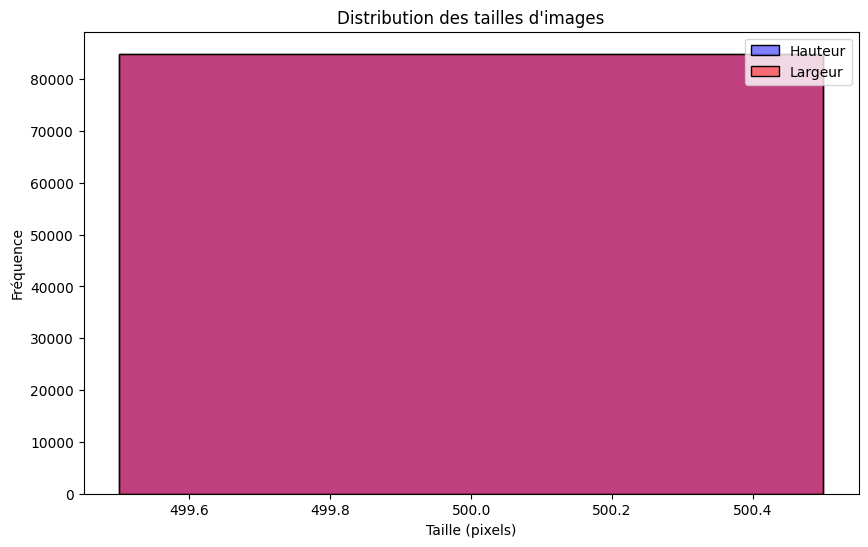

In [36]:
# 📊 Analyse des tailles des images
image_sizes = []

for img_name in train_images:
    img_path = os.path.join(train_image_folder, img_name)
    img = cv2.imread(img_path)
    image_sizes.append(img.shape[:2])  # Récupérer la hauteur et la largeur des images

# Convertir les tailles en DataFrame
image_sizes_df = pd.DataFrame(image_sizes, columns=["Hauteur", "Largeur"])

# Afficher les statistiques de taille
print(image_sizes_df.describe())

# 📊 Distribution des tailles d'images
plt.figure(figsize=(10, 6))
sns.histplot(image_sizes_df["Hauteur"], kde=True, color='blue', label="Hauteur")
sns.histplot(image_sizes_df["Largeur"], kde=True, color='red', label="Largeur")
plt.title("Distribution des tailles d'images")
plt.xlabel("Taille (pixels)")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

## Analyse des Couleurs des Images

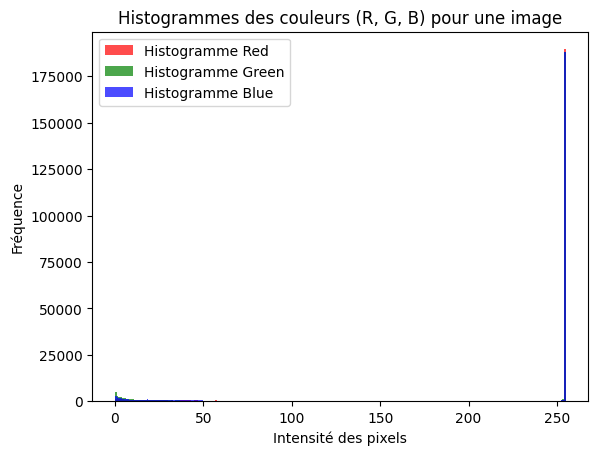

In [37]:
# 📊 Analyse des couleurs des images
# Calculer l'histogramme des couleurs pour une image exemple
sample_img_path = os.path.join(train_image_folder, train_images[0])
sample_img = cv2.imread(sample_img_path)
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

# Calculer les histogrammes des canaux de couleur R, G, B
colors = ['Red', 'Green', 'Blue']
for i, color in enumerate(colors):
    plt.hist(sample_img[..., i].ravel(), bins=256, color=color.lower(), alpha=0.7, label=f'Histogramme {color}')
    
plt.title("Histogrammes des couleurs (R, G, B) pour une image")
plt.xlabel("Intensité des pixels")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

## Vérification des Formats des Images

In [38]:
# 📊 Vérifier les formats d'images (ex: jpg, png, etc.)
formats = [img.split('.')[-1] for img in train_images]
formats_count = pd.Series(formats).value_counts()

print("Distribution des formats d'images :")
print(formats_count)

Distribution des formats d'images :
jpg    84916
Name: count, dtype: int64


## Détection de doublons d’images (hash MD5)

In [39]:
import hashlib
from collections import defaultdict

# Définition des dossiers d’images
train_img_dir = os.path.join(data_path, "images/images/image_train")
test_img_dir  = os.path.join(data_path, "images/images/image_test")

def find_image_duplicates(folder):
    hash_map = defaultdict(list)
    for fname in os.listdir(folder):
        path = os.path.join(folder, fname)
        # calculer MD5
        with open(path, "rb") as f:
            data = f.read()
            h = hashlib.md5(data).hexdigest()
        hash_map[h].append(fname)
    # ne garder que les clés où il y a plus d’un nom de fichier
    return {h: files for h, files in hash_map.items() if len(files) > 1}

dup_train = find_image_duplicates(train_img_dir)
dup_test  = find_image_duplicates(test_img_dir)

print(f"Doublons dans train ({len(dup_train)} hash identiques) :")
for h, files in dup_train.items():
    print(f"  Hash {h[:8]}… → {files}")

print(f"\nDoublons dans test ({len(dup_test)} hash identiques) :")
for h, files in dup_test.items():
    print(f"  Hash {h[:8]}… → {files}")


Doublons dans train (3264 hash identiques) :
  Hash d54f2526… → ['image_1100250821_product_261000874.jpg', 'image_1110020674_product_1884385142.jpg', 'image_1100250245_product_286845877.jpg', 'image_1321271400_product_129717704.jpg']
  Hash 3c09c1f9… → ['image_1276345167_product_4012861715.jpg', 'image_1282024702_product_4050758708.jpg']
  Hash d5bbf5a2… → ['image_1301682739_product_4151269141.jpg', 'image_1310737353_product_4182274088.jpg']
  Hash 98427a7f… → ['image_1240548029_product_3748040542.jpg', 'image_1289814216_product_4087680486.jpg']
  Hash 5afff4fa… → ['image_1292505122_product_4108937463.jpg', 'image_1292538000_product_4108944200.jpg', 'image_1292536132_product_4108943756.jpg', 'image_1292538107_product_4108944209.jpg', 'image_1292514915_product_4108939301.jpg', 'image_1292504391_product_4108937202.jpg', 'image_1292502550_product_4108936934.jpg']
  Hash 01ef4454… → ['image_1211783608_product_3410054692.jpg', 'image_1211781331_product_3410052943.jpg']
  Hash a2688b6b… → ['

## Vérification des associations imageid ↔ productid

In [41]:
def parse_ids_from_filename(fname):
    # format attendu : image_{imageid}_product_{productid}.jpg
    parts = fname.split("_")
    if len(parts) >= 4 and parts[0] == "image" and parts[2] == "product":
        imageid   = int(parts[1])
        productid = int(parts[3].split(".")[0])
        return imageid, productid
    else:
        return None, None

def check_associations(folder, df):
    file_imageids   = set()
    file_productids = {}
    for fname in os.listdir(folder):
        img_id, prod_id = parse_ids_from_filename(fname)
        if img_id is None:
            continue
        file_imageids.add(img_id)
        file_productids[img_id] = prod_id

    df_imageids = set(df["imageid"].astype(int))
    df_product  = df.set_index("imageid")["productid"].to_dict()

    # a) images référencées en base mais absence de fichier
    missing_files = df_imageids - file_imageids

    # b) fichiers orphelins (pas dans la base)
    orphan_files = file_imageids - df_imageids

    # c) mismatch productid
    mismatches = []
    for img_id in df_imageids & file_imageids:
        if df_product.get(img_id) != file_productids.get(img_id):
            mismatches.append({
                "imageid":      img_id,
                "df_product":   df_product.get(img_id),
                "file_product": file_productids.get(img_id)
            })

    return missing_files, orphan_files, mismatches

miss_train, orphan_train, mismatch_train = check_associations(train_img_dir, X_train)
miss_test,  orphan_test,  mismatch_test  = check_associations(test_img_dir,  X_test)

print(f"\nTrain : {len(miss_train)} images manquantes, {len(orphan_train)} orphelines, {len(mismatch_train)} mismatches")
print("Exemples de mismatches :", mismatch_train[:5])

print(f"\nTest : {len(miss_test)} images manquantes, {len(orphan_test)} orphelines, {len(mismatch_test)} mismatches")
print("Exemples de mismatches :", mismatch_test[:5])


Train : 0 images manquantes, 0 orphelines, 0 mismatches
Exemples de mismatches : []

Test : 0 images manquantes, 0 orphelines, 0 mismatches
Exemples de mismatches : []
